In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
file="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv"
king_data=pd.read_csv(file)

In [4]:
king_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Datatype of each column

In [6]:
king_data.dtypes 

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Dropping columns ID and Unamed: 0

In [32]:
king_data=king_data.drop(['id', 'Unnamed: 0'],axis=1)
king_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [75]:
print("number of NaN values for the column bedrooms :", king_data['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", king_data['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [76]:
mean=king_data['bedrooms'].mean()
king_data['bedrooms'].replace(np.nan,mean, inplace=True)

In [80]:
mean=king_data['bathrooms'].mean()
king_data['bathrooms'].replace(np.nan,mean, inplace=True)

In [81]:
print("number of NaN values for the column bedrooms :", king_data['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", king_data['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Check the count of same floors and convert obtained data to pd table

In [82]:
a=king_data.value_counts('floors')
king_data_floors=a.to_frame()
king_data_floors

,0
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Draw a boxplot for deriving relationship between waterfront houses and pricing

<Axes: xlabel='waterfront', ylabel='price'>

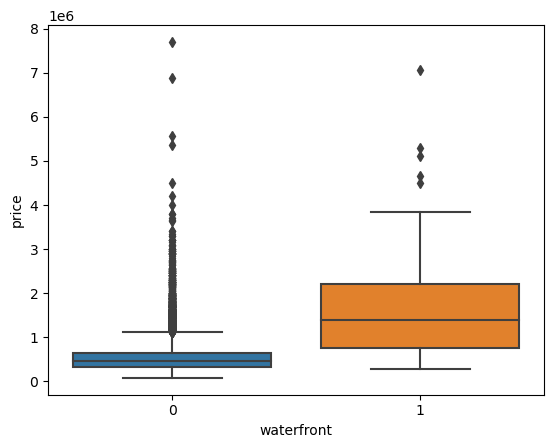

In [83]:
sns.boxplot(x='waterfront',y='price',data=king_data)

# Check if sqft_above is negatively or positively correlated with price with the help of a regplot

<Axes: xlabel='sqft_above', ylabel='price'>

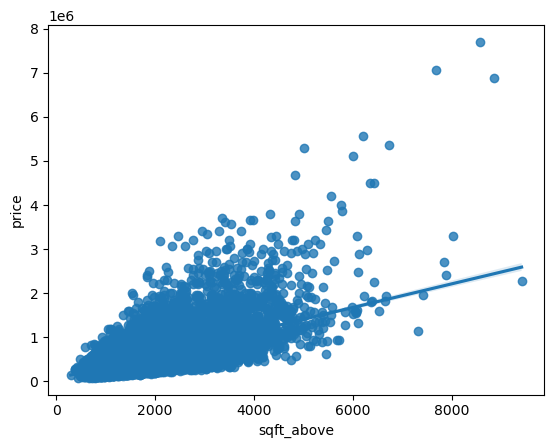

In [84]:
sns.regplot(x='sqft_above',y='price',data=king_data)

## Here we can see a POSITIVE correlation between sqft_above and price as the regression line is linear 

## Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.

In [85]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler as mm
# scalar=mm(feature_range=(0,1))
# x_data=king_data.iloc[:,11:12]
# y_data=king_data.iloc[:,1:2]
# x_train, y_train,x_test,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [86]:
X = king_data[['sqft_above']]
Y = king_data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.3667117528382794

In [87]:
X = king_data[['price']]
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15",
           "sqft_above","grade","sqft_living"]     
Y=king_data[features]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.2284821051982868

In [95]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)

In [98]:
A=king_data[features]
B=king_data['price']
pipe.fit(A,B)
pipe.score(A,B)

0.7513404101380663

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [100]:
X = king_data[features]
Y = king_data['price']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [103]:
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 6484
number of training samples: 15129


## Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [104]:
from sklearn.linear_model import Ridge

In [120]:
Ridge_test = Ridge(alpha = 0.1)
Ridge_test.fit(x_train, y_train)
Ridge_test.score(x_test, y_test)

0.6441243055128112

## Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [121]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr
Ridge_test.fit(x_train_pr, y_train)
Ridge_test.score(x_test_pr, y_test)

0.7308759459507529